In [3]:
library(BasketballAnalyzeR)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



In [2]:
# example(shotchart)

In [3]:
data(package="BasketballAnalyzeR")

Package,Item,Title
<chr>,<chr>,<chr>
BasketballAnalyzeR,Obox,Opponents box scores dataset - NBA 2017-2018
BasketballAnalyzeR,PbP.BDB,Play-by-play dataset - NBA 2017-2018
BasketballAnalyzeR,Pbox,Players box scores dataset - NBA 2017-2018
BasketballAnalyzeR,Tadd,Tadd dataset - NBA 2017-2018
BasketballAnalyzeR,Tbox,Teams box scores dataset - NBA 2017-2018


In [4]:
PbP <- PbPmanipulation(PbP.BDB)

# 1 - Basic statiscal analyses
## 1.1 - Pace, Ratings, Four Factors

In [5]:
tm <- c("BOS", "CLE", "GSW", "HOU")

In [6]:
selTeams <- which(Tadd$team %in% tm)

FF - fourfactors contains a data frame with Possession, Pace (possesions/minute), Offensive/Defensive Ratings and Four Factors as columns

In [7]:
FF.sel <- fourfactors(Tbox[selTeams,], Obox[selTeams,])

In [8]:
FF.sel

Team,POSS.Off,POSS.Def,PACE.Off,PACE.Def,ORtg,DRtg,F1.Off,F2.Off,F3.Off,F4.Off,F1.Def,F2.Def,F3.Def,F4.Def
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Boston Celtics,8103.68,8110.12,2.045867,2.047493,105.25,101.54,51.76,14.18,21.48,18.75,49.48,14.29,78.44,19.13
Cleveland Cavaliers,8221.96,8229.72,2.083619,2.085585,110.57,109.53,54.70,13.70,20.06,21.41,53.98,13.43,77.27,16.58
Golden State Warriors,8287.92,8457.08,2.100335,2.143203,112.26,104.22,56.91,15.26,21.05,19.48,50.44,13.89,76.31,18.55
Houston Rockets,8208.84,8209.40,2.077661,2.077803,112.23,103.76,55.05,13.83,21.25,23.30,52.14,14.54,79.92,17.12


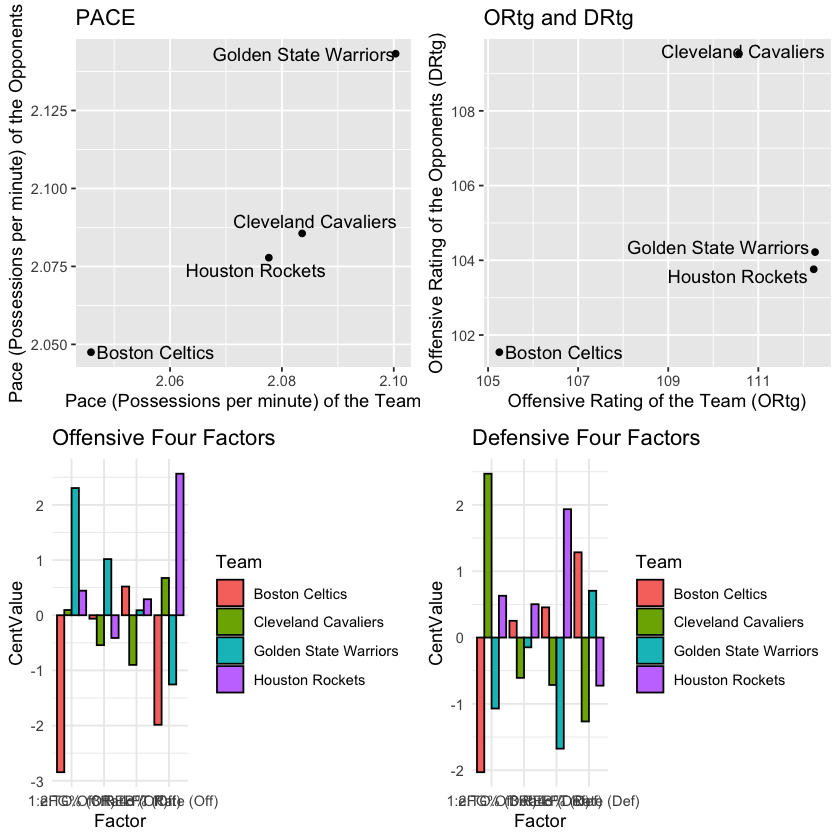

In [9]:
plot(FF.sel)

In [10]:
FF <- fourfactors(Tbox, Obox)

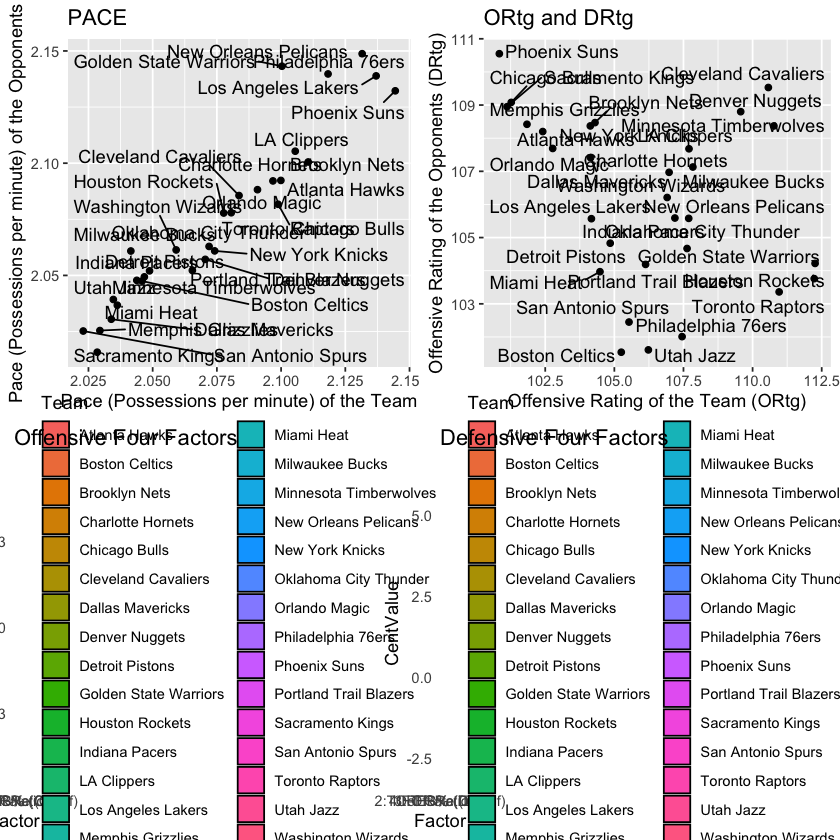

In [11]:
listPlots <- plot(FF)

In [12]:
library(gridExtra) # to present the above graph in grids

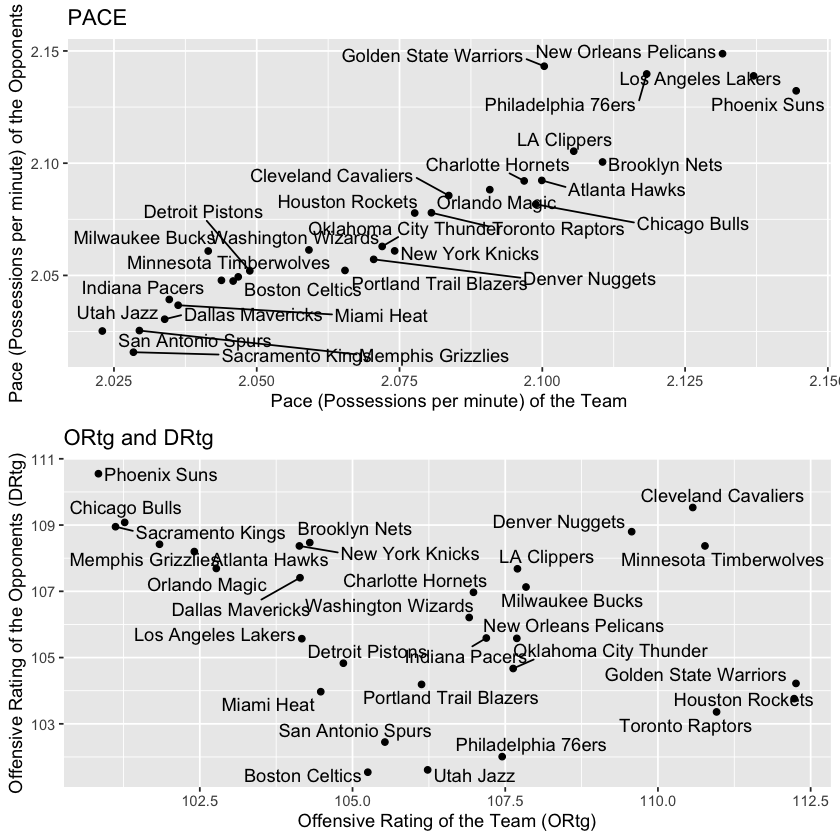

In [13]:
grid.arrange(grobs=listPlots[1:2], ncol=1)

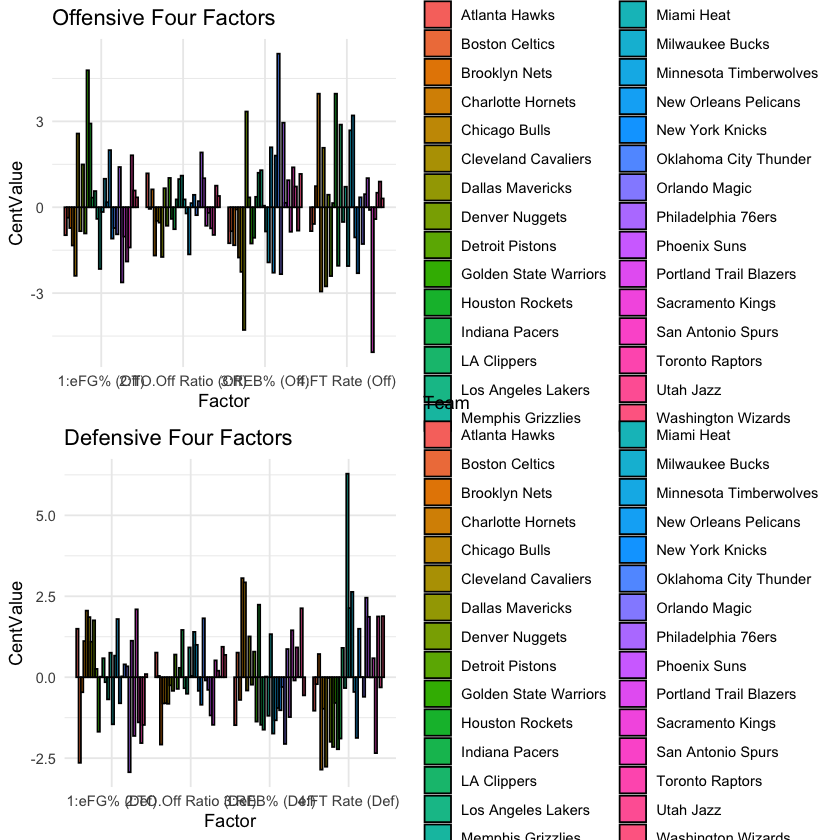

In [14]:
grid.arrange(grobs=listPlots[3:4], ncol=1)

## 1.2 - Bar-line plots

In [15]:
X <- data.frame(Tbox, PTS.O=Obox$PTS, TOV.O=Obox$TOV,
               CONF=Tadd$Conference)

In [16]:
XW <- subset(X, CONF=="W")

In [17]:
labs <- c("Steals", "Blocks", "Defensive Rebounds")

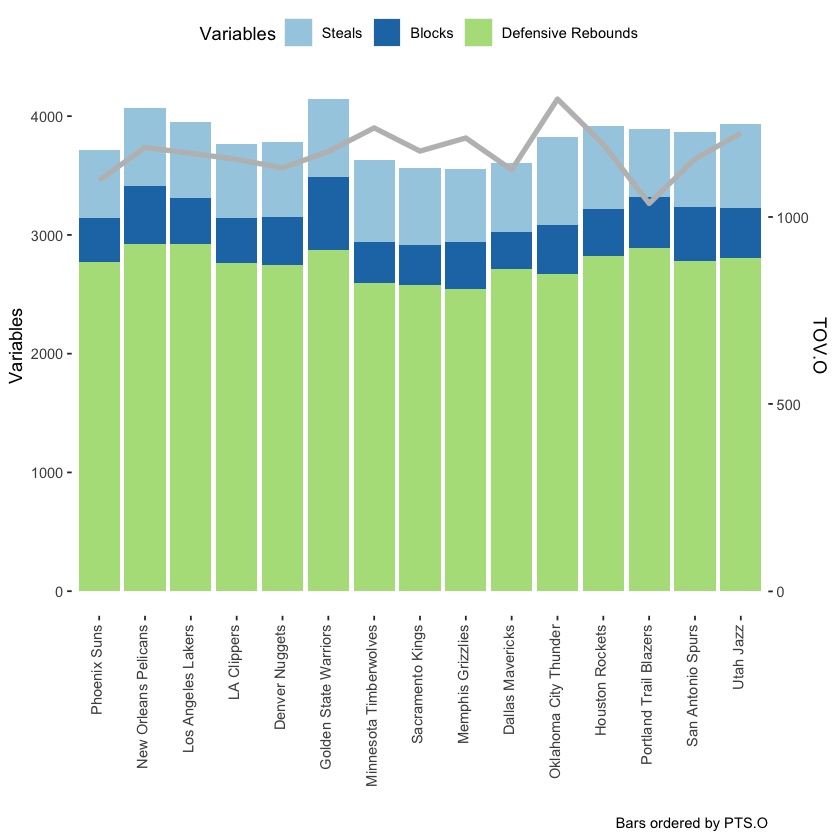

In [18]:
barline(data=XW, id="Team", bars=c("STL", "BLK", "DREB"),
       line="TOV.O", order.by="PTS.O", labels.bars=labs)

Main defensive statistics of the Western Conference NBA teams: steals, blocks, defensive rebounds

The graph does not highlight any evident relationship between statistics and point scored. In fact, the teams towards the left (highest values of points scored by the opponents eg: Phoenix suns PTS.Opp = 9290) are not necessarily those with the lowest bars.

But, player statistics can be represented. Assume we are interested in finding a Houston Rockets player who has played at least 500 minutes, we can draw a bar-line plot for the shooting percentages

In [4]:
Pbox.HR <- subset(Pbox, Team=="Houston Rockets" & MIN>=500)

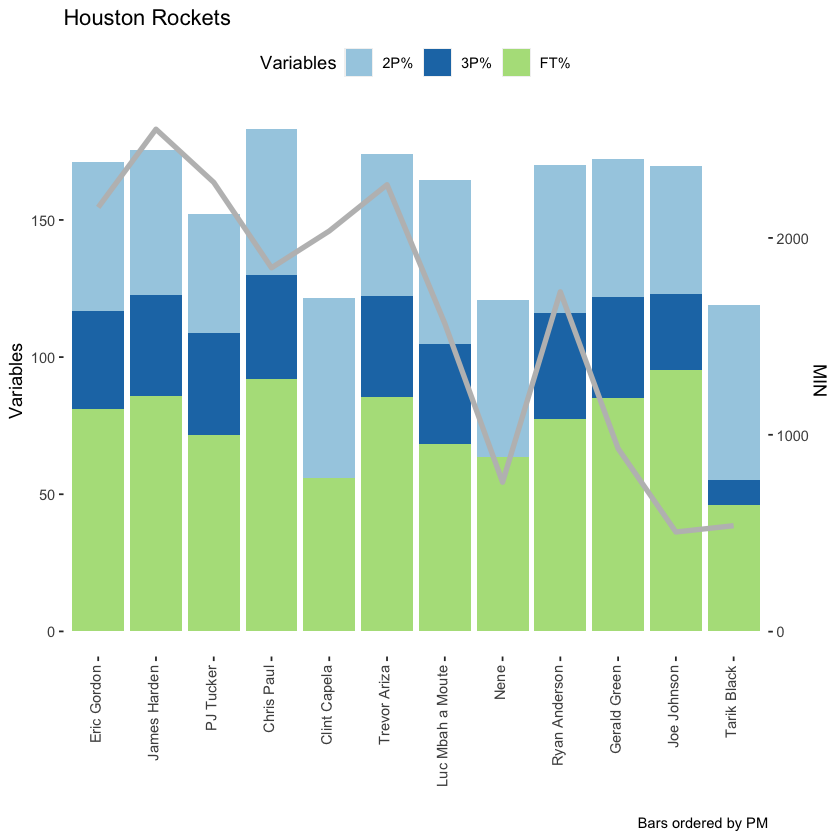

In [5]:
barline(data=Pbox.HR, id="Player",
       bars=c("P2p", "P3p", "FTp"), line="MIN",
       order.by="PM", labels.bars=c("2P%", "3P%", "FT%"),
       title="Houston Rockets")

This shows that players towards the left tend to have the highest played minutes, but not necessarily the best shooting performance

## 1.3 Radial plots

In [6]:
Pbox.PG <- subset(Pbox, Player=="Russell Westbrook" |
                 Player=="Stephen Curry" |
                 Player=="Chris Paul" |
                 Player=="Kyrie Irving" |
                 Player=="Damian Lillard" |
                 Player=="Kyle Lowry" |
                 Player=="John Wall" |
                 Player=="Rajan Rondo" |
                 Player=="Kemba Walker")

In [7]:
attach(Pbox.PG)
X <- data.frame(P2M, P3M, FTM, REB=OREB+DREB, AST,
               STL, BLK)/MIN

In [8]:
detach(Pbox.PG)

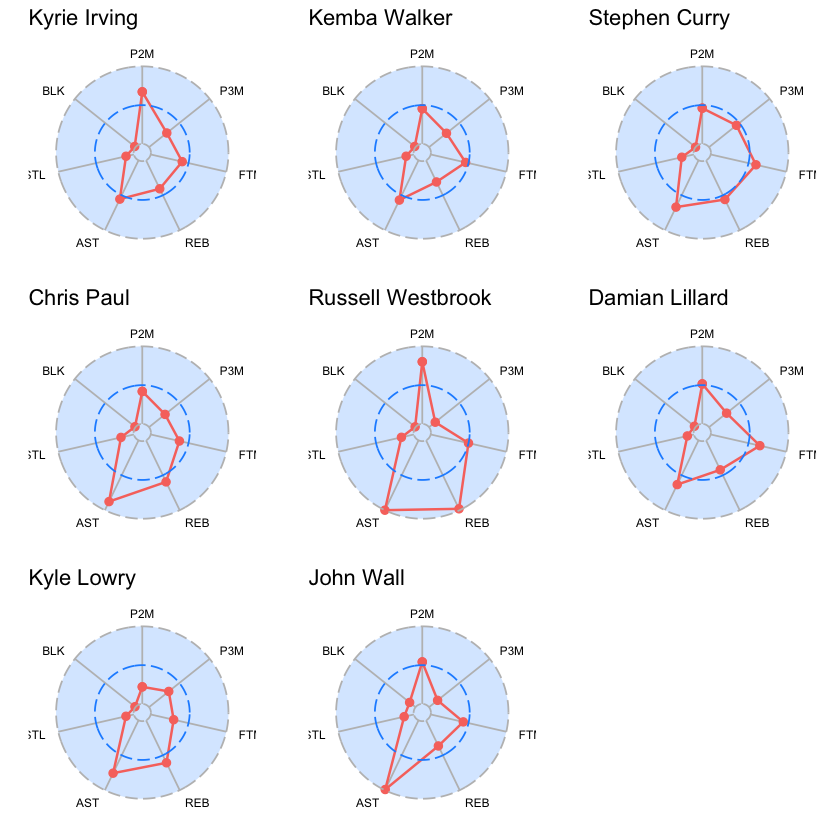

In [9]:
radialprofile(data=X, title=Pbox.PG$Player, std=FALSE)

^ Non-standardized variables. Dashed blue line: midpoint b/w minimum and maximum

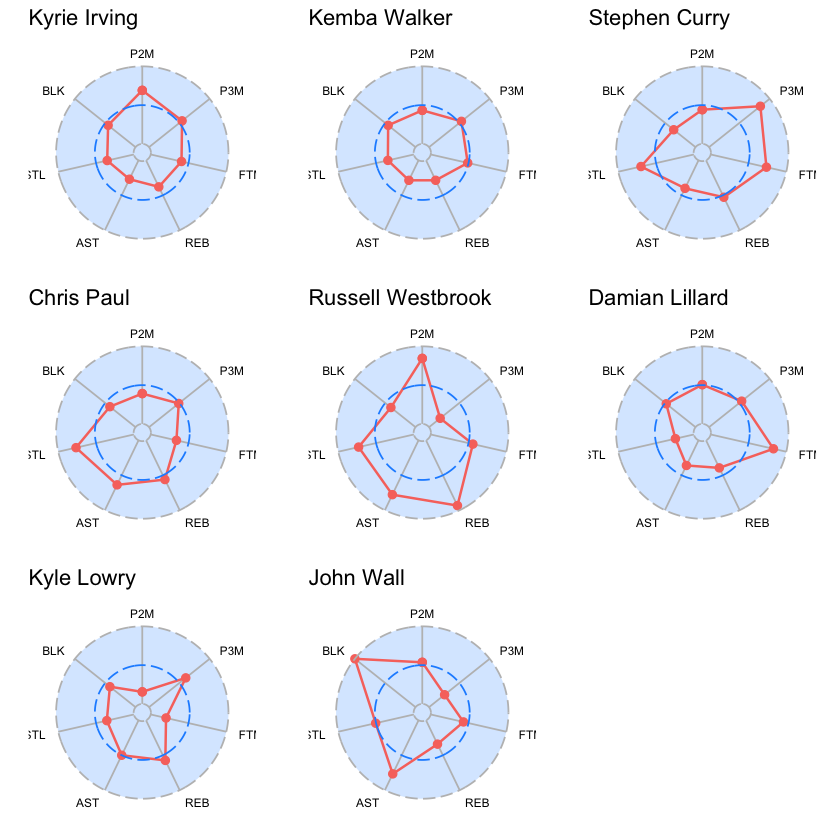

In [10]:
radialprofile(data=X, title=Pbox.PG$Player, std=TRUE)

^ Standardized variables. Dashed blue line: zero (average of each variable)

#### Standardized (aka normalized) using linear transformation

$Z = {X- \mu x \over \sigma x}$


where:

"μx" is the [[mean]] of the population.

"σ" is the [[standard deviation]] of the population.

## 1.4 Scatter plots

In [11]:
Pbox.sel <- subset(Pbox, MIN>= 500)

In [12]:
attach(Pbox.sel)

In [13]:
X <- data.frame(AST, TOV, PTS)/MIN

In [14]:
detach(Pbox.sel)

Goal: investigate the relationship between assists and turnovers per minute of all players who have played at least 500 minutes, also highlight by color codes the points scored per minute

In [15]:
mypal <- colorRampPalette(c('blue', 'yellow', 'red'))

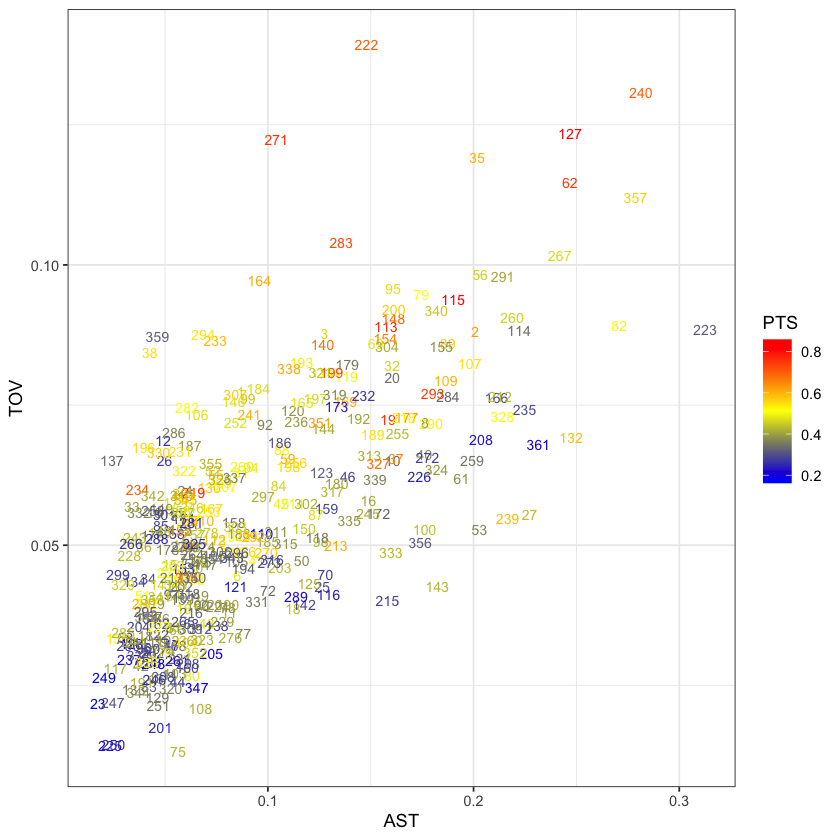

In [16]:
scatterplot(X, data.var=c("AST", "TOV"), z.var="PTS",
           labels=1:nrow(X), palette=mypal)

In [17]:
SAS <- which(Pbox.sel$Team=='San Antonio Spurs')

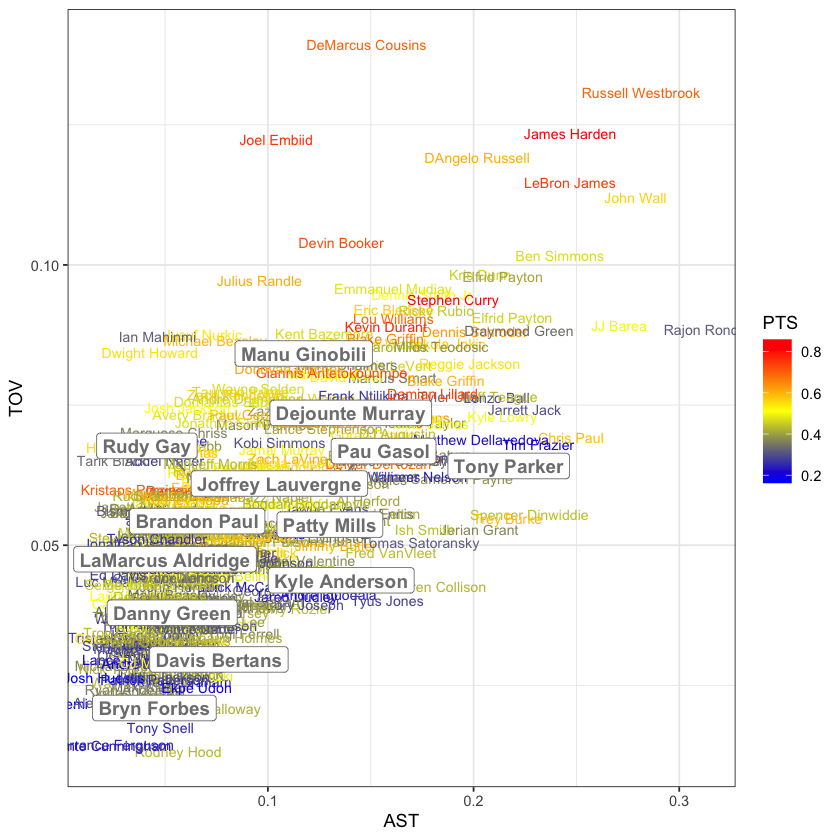

In [18]:
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

Warning message:
“Removed 331 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_label_repel).”


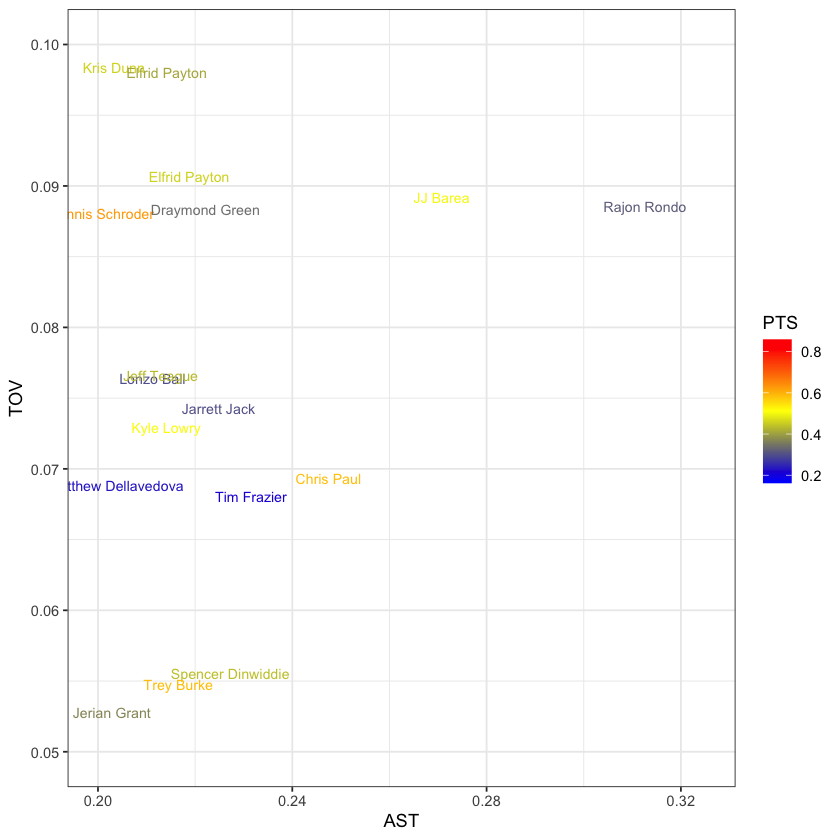

In [19]:
# zoom into [0.20, 0.325] x [0.05, 0.10]
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            zoom=c(0.20, 0.325, 0.05, 0.10), # from 0.2 to 0.5 assists, and 0.05 to 0.10 turnovers
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

What do we find?

Looking at the graph, we note that the number of turnovers tends to increase with increasing assist values. This reflects a clear insight: the more a player moves the ball, the more likely they turn it over.

## 1.5 Bubble plots

What is a Bubble plot?

It is a scatter plot where individual cases (teams and players) are plotted in the plane by means of bubbles instead of points.
Size and color of the bubble can be used to vizualize four features information. 

In [20]:
attach(Tbox)

In [21]:
# P2p - 2pt%
# P3p - 3pt%
# FTp - free throw%
# AS - Attempted shots = 2pt attempts + 3pt attempts + Free throw attempts
X <- data.frame(T=Team, P2p, P3p, FTp, AS=P2A+P3A+FTA)

In [22]:
detach(Tbox)

In [23]:
labs <- c("2-point shots (% made)",
         "3-point shots (% made)",
          "free throw (% made)",
          "Total shots attempted")

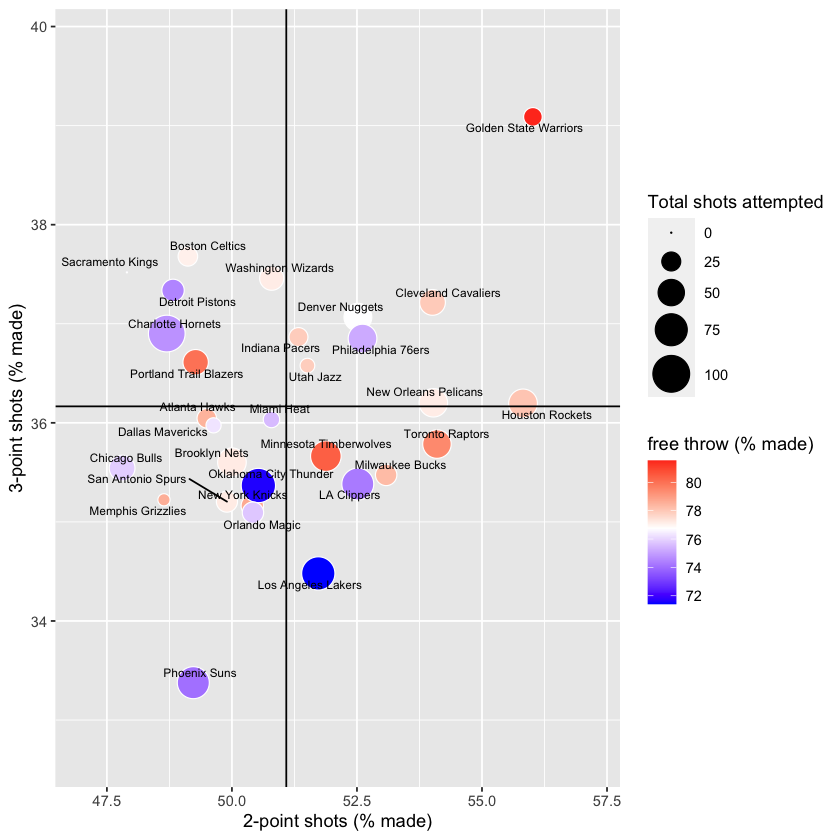

In [24]:
bubbleplot(X, id="T", x="P2p", y="P3p", col="FTp", size="AS", labels=labs)

^ Bubble plot of teams according to shooting percentages and total shots attempted

In [25]:
Pbox.GSW.CC <- subset(Pbox, (Team=="Golden State Warriors" | Team=="Cleveland Cavaliers") & MIN>=500)

In [26]:
attach(Pbox.GSW.CC)

In [27]:
X <- data.frame(ID=Player, Team, V1=DREB/MIN, V2=STL/MIN, V3=BLK/MIN, V4=MIN)

In [28]:
detach(Pbox.GSW.CC)

In [29]:
labs <- c("Defensive Rebounds", "Steals", "Blocks", "Total minutes played")

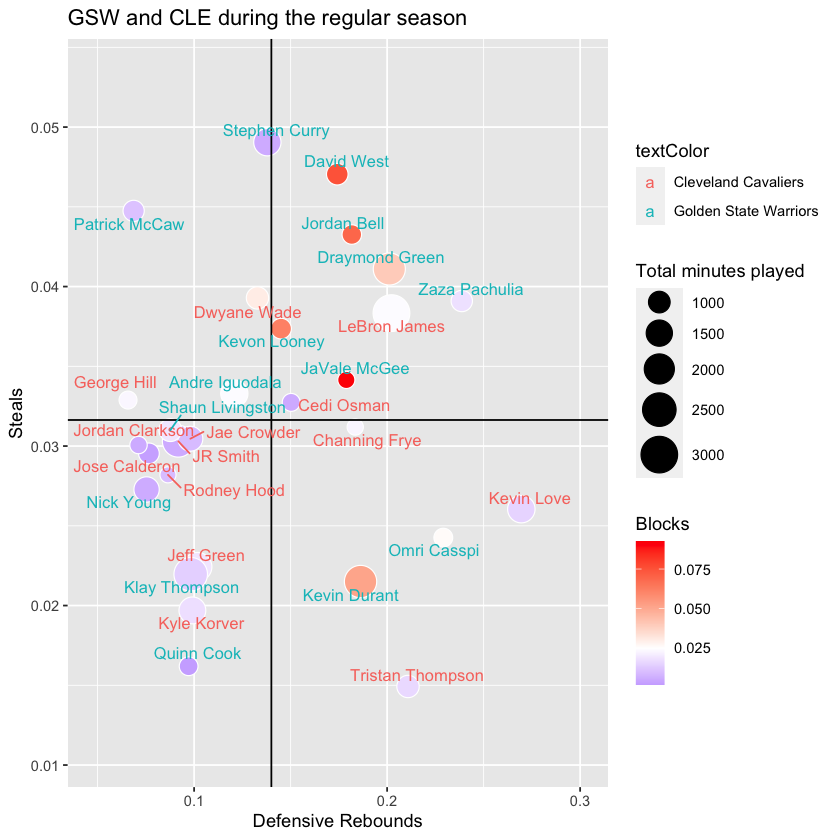

In [30]:
bubbleplot(X, id="ID", x="V1", y="V2", col="V3", 
           size="V4", text.col="Team", labels=labs,
           title="GSW and CLE during the regular season",
           text.legend=TRUE, text.size=3.5, scale=FALSE)

^ Bubble plots of GSW and CLE players according to statistics related to defense (per minute played)

Some interesting evidence!

1. In the top right quadrant, we have players with above average defensive rebounds and steals, along with high blocks, and they are predominantly GSW players. Of course, King LeBron James being the only CLE player amongst those same ratings.
2. Jordan Bell and David West exhibit excellent performance despite having played for fewer minutes
3. Kevin Durant has blocks and rebounds above average, but below avergare steals.
4. Stephen Curry has high steals, worst value for rebounds, and below average blocks. True to chef's position though.

## 1.6 Variability analysis

Variablilty in statistics describes the extent of data deviation from the average, as well as the extent to which they tend to be different from each other.

For given variable $X$ the various indexes of variability are:
1. Range - most commonly used - difference between maximum and minimum
2. Interquartile difference - difference between third and first quartiles
3. Variance - Total Deviance (TD) - $\sigma^2_{X} = \frac{\sum_{i=1} (x_i - \mu_X)^2}{N}$
4. Standard deviation - $\sigma_{X} = \sqrt{\sigma^2_{X}}$

Can be normalized using variation coefficient *VC*

$VC = \frac{\sigma_{X}}{\mu_{X}}$       for when values ${x_{i}}$ are all positive - i.e. $min(x_{i} > 0)$


   $= \frac{\sigma_{X}}{|\mu_{X}|}$     for when values ${x_{i}}$ are all negative - i.e. $max(x_{i} < 0)$ . Hardly ever happens, quite uncommon

In basketball, variabilty may be used to analyze the extent to which the players of a team perform differntly from each other according to a given statistic.

Examples: 
PRO - high variability can mean that the team is well balanced according to a given skill - well balanced for a given skill - few players who are excelling in a specific task compared to other players devoted to other tasks
CON - high variability with generic perfromance like, goal percentage or buckets made, means that the team relies too much on few players able to score goals/buckets, while others are far below the team standards


In [31]:
Pbox.OKC <- subset(Pbox, Team=="Oklahoma City Thunder" & MIN>=500)

In [33]:
vrb1 <- variability(data=Pbox.OKC, data.var="P3p", size.var="P3A")

^ Measure variability of 3pt shot perventage of Oklahoma City Thunder players who have atleast played 500 minutes


In [43]:
vrb2 <- variability(data=Pbox.OKC,
                   data.var=c("P2p", "P3p", "FTp"),
                   size.var=c("P2A", "P3A", "FTA"),
                   weight=TRUE  # noramlized variability
                  )

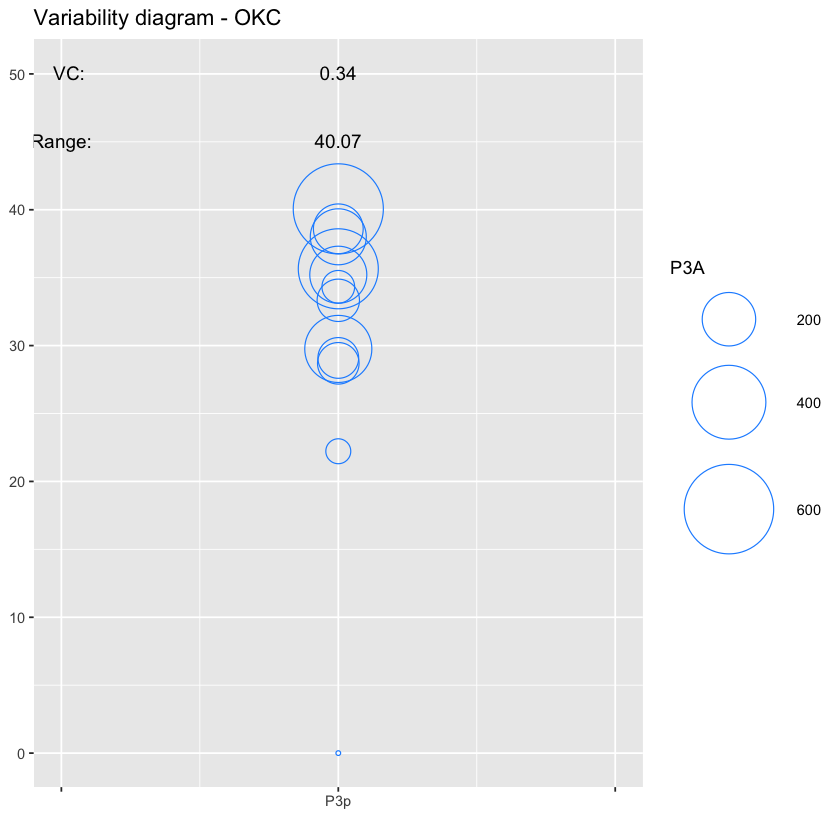

In [44]:
plot(vrb1, title="Variability diagram - OKC")

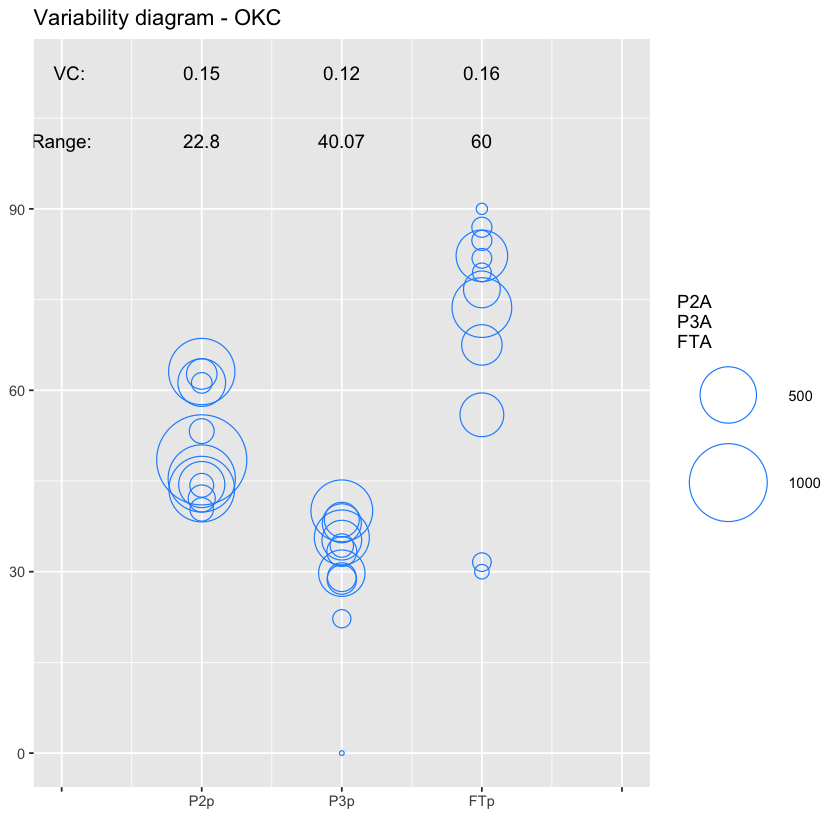

In [45]:
plot(vrb2, title="Variability diagram - OKC")